In [51]:
import os
os.getcwd()

'C:\\Users\\katri\\Desktop\\python\\python week 7'

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
salary = pd.read_csv('Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [55]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


NOTE: This is a very small dataset with only 30 samples

In [56]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## exploratory data analysis

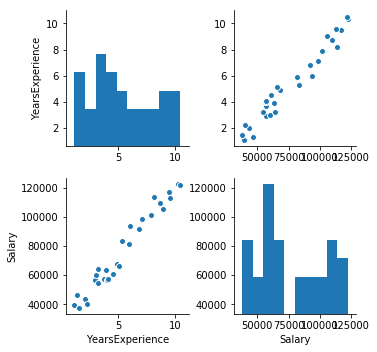

In [57]:
#check the correlation of between Salary and Years of experience as well as distribution of Salary, Years of Experience
sns.pairplot(salary)

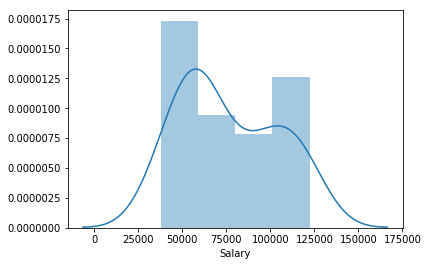

In [58]:
#closer look at distribution of salary
sns.distplot(salary['Salary'])

In [59]:
X = pd.DataFrame(salary['YearsExperience'])
y = pd.DataFrame(salary['Salary'])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
#establish testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=0)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
#set up linear regression
lm = LinearRegression()

In [64]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## interpret the model

In [65]:
# print y intercept
print(lm.intercept_)

[ 26816.19224403]


In [66]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[ 9345.94244312]]


y hat is the predicted salary of an employee. 

y hat = $26,816.19 + $9,345.92 * (years of experience)

## make predictions

In [67]:
predictions = lm.predict(X_test)

Text(0,0.5,'Predicted Y')

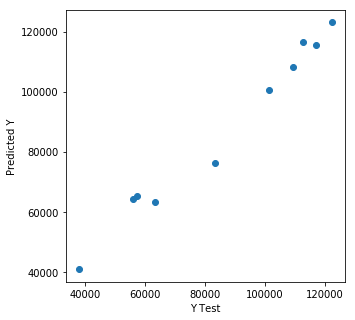

In [73]:
fig = plt.subplots(figsize=(5,5))
plt.scatter(np.sort(y_test),predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

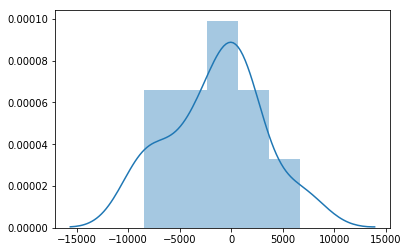

In [69]:
#check the distribution of error
sns.distplot((y_test-predictions),bins=5)

Most predictions are within $5,000 of the correct salary- this looks pretty accurate!

## evaluate the model

In [70]:
from sklearn import metrics

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3426.42693743
MSE: 21026037.3295
RMSE: 4585.41572047


RMSE confirms earlier statement that most prediction are within $5,000 of the actual salary- really good especially considering small sample size